# TurboAz Verilənlərinin Analizi - Data Preprocessing


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('turbo_az.csv')
df.head(3)

,Avtosalon,Qiymet,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,...,Yeni,Vəziyyəti,Yeniləndi,Baxışların sayı,Extra,Etrafli,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı
0,0,13500,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənib",28.05.2023,267,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",Salam Barter mümkündür. 1.6 sadə mator mexanik...,2,Avropa,5,NaN
1,1,23500,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,...,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,12410,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",TOYOTA CAROLLA 2023 ALIŞ. 2 İL 80.000 KM ZƏMAN...,1,Rəsmi diler,5,NaN
2,0,33200,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,148,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Yeni gelib bakida surlmuyb qiymet mawin yanind...,1,Avropa,7,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Avtosalon                 10000 non-null  int64 
 1   Qiymet                    10000 non-null  int64 
 2   Valyuta                   10000 non-null  object
 3   Şəhər                     10000 non-null  object
 4   Marka                     10000 non-null  object
 5   Model                     10000 non-null  object
 6   Buraxılış ili             10000 non-null  int64 
 7   Ban növü                  10000 non-null  object
 8   Rəng                      10000 non-null  object
 9   Mühərrik                  10000 non-null  object
 10  Yürüş                     10000 non-null  object
 11  Sürətlər qutusu           10000 non-null  object
 12  Ötürücü                   10000 non-null  object
 13  Yeni                      10000 non-null  object
 14  Vəziyyəti              

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Avtosalon,10000.0,NaN,NaN,NaN,0.2537,0.43515,0.0,0.0,0.0,1.0,1.0
Qiymet,10000.0,NaN,NaN,NaN,27318.5214,28995.789851,1100.0,12700.0,21000.0,32500.0,850000.0
Valyuta,10000,3,AZN,7508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Şəhər,10000,61,Bakı,7804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marka,10000,111,Mercedes,1551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,10000,893,Sorento,338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buraxılış ili,10000.0,NaN,NaN,NaN,2010.0679,8.386246,1938.0,2006.0,2011.0,2015.0,2023.0
Ban növü,10000,19,Sedan,4391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rəng,10000,17,Ağ,2853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mühərrik,10000,1307,2.0 L/184 a.g./Dizel,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Boş dəyərlərin yoxlanılması
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Boş dəyərlər': missing_values,
    'Faiz': missing_percent
})

missing_df[missing_df['Boş dəyərlər'] > 0].sort_values('Boş dəyərlər', ascending=False)

,Boş dəyərlər,Faiz
Qəzalı,9968,99.68
Sahiblər,3807,38.07
Hansı bazar üçün yığılıb,3298,32.98
Yerlərin sayı,3168,31.68
Extra,764,7.64
Etrafli,282,2.82
Vəziyyəti,28,0.28


## Verilənlərin təmizlənməsi və çevrilməsi

In [9]:
# Verilənlərin surətini çıxaraq
df_clean = df.copy()

# Sütun adlarını standartlaşdıraq
df_clean.columns = [col.lower().replace(' ', '_') for col in df_clean.columns]

In [10]:
# Qiymət sütununu ədədi dəyərə çevirmək
df_clean['qiymet'] = pd.to_numeric(df_clean['qiymet'], errors='coerce')

# Valyuta sütununu yoxlayaq
print("Valyuta növləri:")
print(df_clean['valyuta'].value_counts())

# Bütün qiymətləri AZN-ə çevirək
# USD-AZN məzənnəsini təxmini 1.7 qəbul edirik
df_clean['qiymet_azn'] = df_clean.apply(
    lambda row: row['qiymet'] * 1.7 if row['valyuta'] == 'USD' else row['qiymet'], 
    axis=1
)

Valyuta növləri:
valyuta
AZN    7508
USD    2469
EUR      23
Name: count, dtype: int64


In [11]:
# Buraxılış ili sütununu ədədi dəyərə çevirmək
df_clean['buraxılış_ili'] = pd.to_numeric(df_clean['buraxılış_ili'], errors='coerce')

# Avtomobilin yaşını hesablayaq (2025-ci il üçün)
df_clean['avtomobil_yasi'] = 2025 - df_clean['buraxılış_ili']

In [12]:
# Mühərrik məlumatlarını emal edək
# Nümunə: '1.6 L/101 a.g./Benzin'

def extract_engine_info(engine_str):
    if pd.isna(engine_str):
        return np.nan, np.nan, np.nan
    
    parts = engine_str.split('/')
    
    # Mühərrik həcmi
    try:
        volume = float(parts[0].split()[0])
    except:
        volume = np.nan
    
    # At gücü
    try:
        power = int(parts[1].split()[0])
    except:
        power = np.nan
    
    # Yanacaq növü
    try:
        fuel_type = parts[2].strip()
    except:
        fuel_type = np.nan
    
    return volume, power, fuel_type

# Mühərrik məlumatlarını ayıraq
df_clean[['muherrik_hecmi', 'at_gucu', 'yanacaq_novu']] = df_clean.apply(
    lambda row: pd.Series(extract_engine_info(row['mühərrik'])), 
    axis=1
)

In [13]:
# Yürüş məlumatlarını emal edək
# Nümunə: '370 000 km'

def extract_mileage(mileage_str):
    if pd.isna(mileage_str):
        return np.nan
    
    try:
        # Boşluqları və 'km' yazısını təmizləyək
        mileage_str = mileage_str.replace('km', '').strip()
        # Boşluqları təmizləyək və ədədə çevirək
        return float(mileage_str.replace(' ', ''))
    except:
        return np.nan

df_clean['yurus_km'] = df_clean['yürüş'].apply(extract_mileage)

In [14]:
# Yeni/Köhnə avtomobil olmasını kodlaşdıraq
df_clean['yenidir'] = df_clean['yeni'].map({'Bəli': 1, 'Xeyr': 0})

In [15]:
# Vəziyyəti emal edək
# Nümunə: "Vuruğu yoxdur, rənglənib"

df_clean['vuruq_yoxdur'] = df_clean['vəziyyəti'].str.contains('Vuruğu yoxdur').fillna(False).astype(int)
df_clean['renglenmeyib'] = df_clean['vəziyyəti'].str.contains('rənglənməyib').fillna(False).astype(int)

C:\Users\salim\AppData\Local\Temp\ipykernel_21100\916660631.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['vuruq_yoxdur'] = df_clean['vəziyyəti'].str.contains('Vuruğu yoxdur').fillna(False).astype(int)
C:\Users\salim\AppData\Local\Temp\ipykernel_21100\916660631.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['renglenmeyib'] = df_clean['vəziyyəti'].str.contains('rənglənməyib').fillna(False).astype(int)


In [16]:
# Baxış sayını ədədi dəyərə çevirək
df_clean['baxislarin_sayi'] = pd.to_numeric(df_clean['baxışların_sayı'], errors='coerce')

In [17]:
# Kateqorik dəyişənləri one-hot encoding ilə kodlaşdıraq
categorical_cols = ['şəhər', 'marka', 'ban_növü', 'rəng', 'sürətlər_qutusu', 'ötürücü', 'yanacaq_novu']

for col in categorical_cols:
    if col in df_clean.columns:
        # Ən çox rast gəlinən 10 dəyəri götürək (verilənlərin həcmini azaltmaq üçün)
        top_values = df_clean[col].value_counts().nlargest(10).index
        for value in top_values:
            df_clean[f"{col}_{value}"] = (df_clean[col] == value).astype(int)

In [18]:
# Extra funksiyaları emal edək
common_features = [
    'ABS', 'Kondisioner', 'Lyuk', 'Dəri salon', 'Park radarı', 
    'Ksenon lampalar', 'Arxa görüntü kamerası', 'Yağış sensoru'
]

for feature in common_features:
    df_clean[f'has_{feature.lower().replace(" ", "_")}'] = df_clean['extra'].str.contains(feature, na=False).astype(int)

In [19]:
# Boş dəyərləri yoxlayaq
missing_values = df_clean.isnull().sum()
missing_percent = (missing_values / len(df_clean)) * 100

missing_df = pd.DataFrame({
    'Boş dəyərlər': missing_values,
    'Faiz': missing_percent
})

# Boş dəyərləri olan sütunların göstərilməsi
missing_df[missing_df['Boş dəyərlər'] > 0].sort_values('Boş dəyərlər', ascending=False)

,Boş dəyərlər,Faiz
qəzalı,9968,99.68
sahiblər,3807,38.07
hansı_bazar_üçün_yığılıb,3298,32.98
yerlərin_sayı,3168,31.68
extra,764,7.64
etrafli,282,2.82
vəziyyəti,28,0.28


In [20]:
# Ədədi sütunlardakı boş dəyərləri orta qiymətlə doldurmaq
numeric_cols = ['qiymet_azn', 'buraxılış_ili', 'avtomobil_yasi', 'muherrik_hecmi', 'at_gucu', 'yurus_km', 'baxislarin_sayi']

for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [21]:
# Outlier-ləri yoxlayaq və təmizləyək
def remove_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Qiymət və yürüş üçün outlier-ləri təmizləyək
df_clean = remove_outliers(df_clean, 'qiymet_azn')
df_clean = remove_outliers(df_clean, 'yurus_km')

print(f"Outlier-lər təmizləndikdən sonra verilənlərin ölçüsü: {df_clean.shape}")

Outlier-lər təmizləndikdən sonra verilənlərin ölçüsü: (9709, 94)


In [22]:
# Təmizlənmiş verilənləri saxlayaq
df_clean.to_csv('turbo_az_clean.csv', index=False)
print("Təmizlənmiş verilənlər 'turbo_az_clean.csv' faylında saxlanıldı.")

Təmizlənmiş verilənlər 'turbo_az_clean.csv' faylında saxlanıldı.


In [33]:
df = pd.read_csv('turbo_az_clean.csv')
df.head(3)

,avtosalon,qiymet,valyuta,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,mühərrik,...,yanacaq_novu_Plug-in Hibrid,yanacaq_novu_Qaz,has_abs,has_kondisioner,has_lyuk,has_dəri_salon,has_park_radarı,has_ksenon_lampalar,has_arxa_görüntü_kamerası,has_yağış_sensoru
0,0,13500,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,...,0,0,1,1,0,1,0,1,0,0
1,1,23500,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,...,0,0,1,1,0,0,1,1,1,1
2,0,33200,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,...,0,0,1,1,1,1,1,1,1,1


## Verilənlərin vizualizasiyası

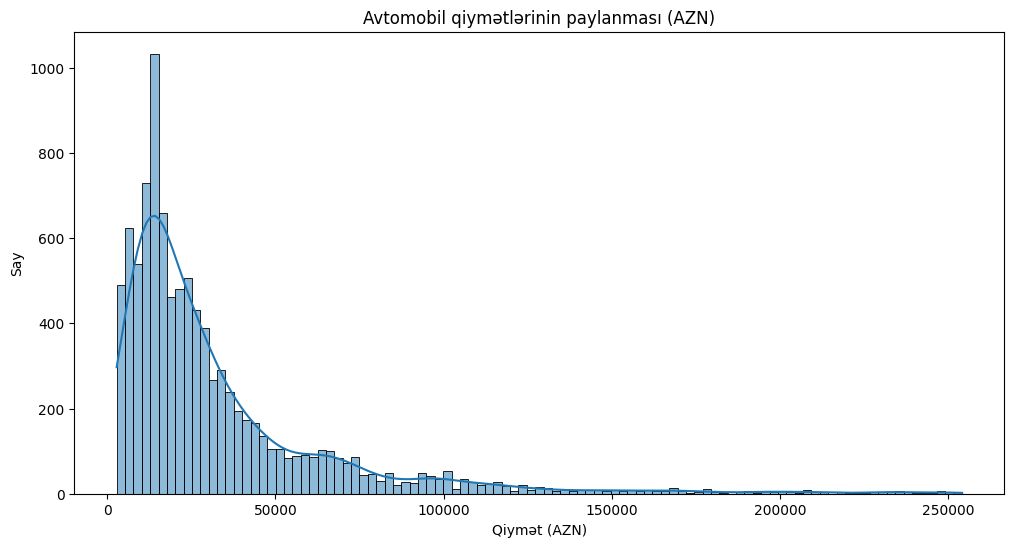

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['qiymet_azn'], kde=True)
plt.title('Avtomobil qiymətlərinin paylanması (AZN)')
plt.xlabel('Qiymət (AZN)')
plt.ylabel('Say')
plt.show()

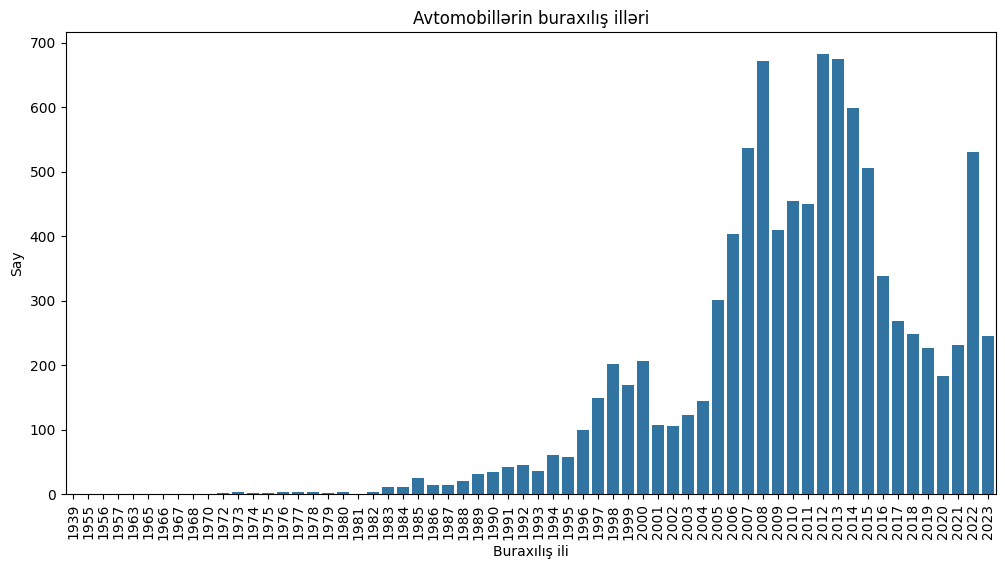

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='buraxılış_ili', data=df_clean, order=sorted(df_clean['buraxılış_ili'].unique()))
plt.title('Avtomobillərin buraxılış illəri')
plt.xlabel('Buraxılış ili')
plt.ylabel('Say')
plt.xticks(rotation=90)
plt.show()

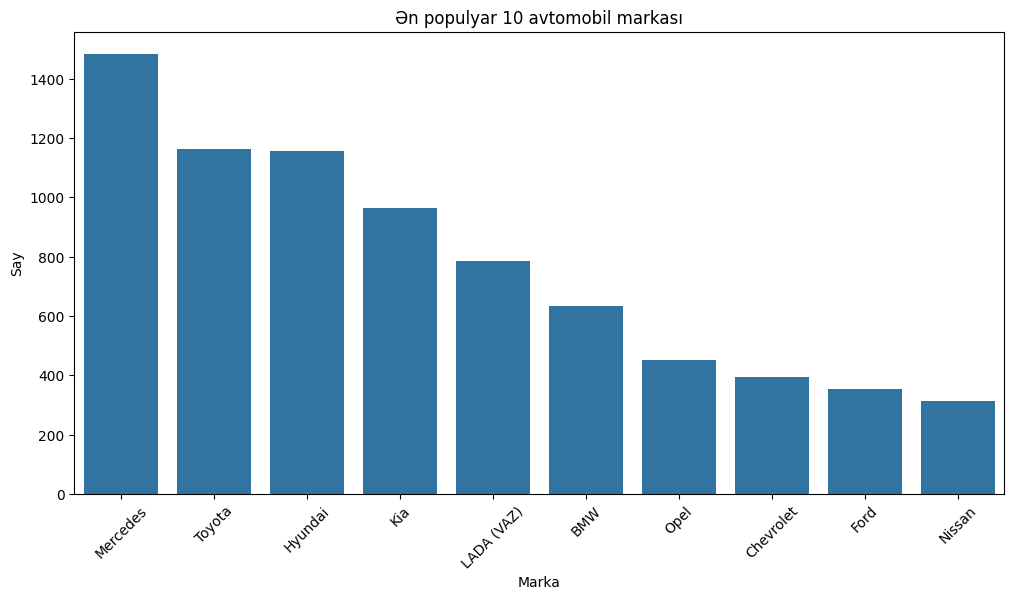

In [25]:
plt.figure(figsize=(12, 6))
top_brands = df_clean['marka'].value_counts().nlargest(10)
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Ən populyar 10 avtomobil markası')
plt.xlabel('Marka')
plt.ylabel('Say')
plt.xticks(rotation=45)
plt.show()

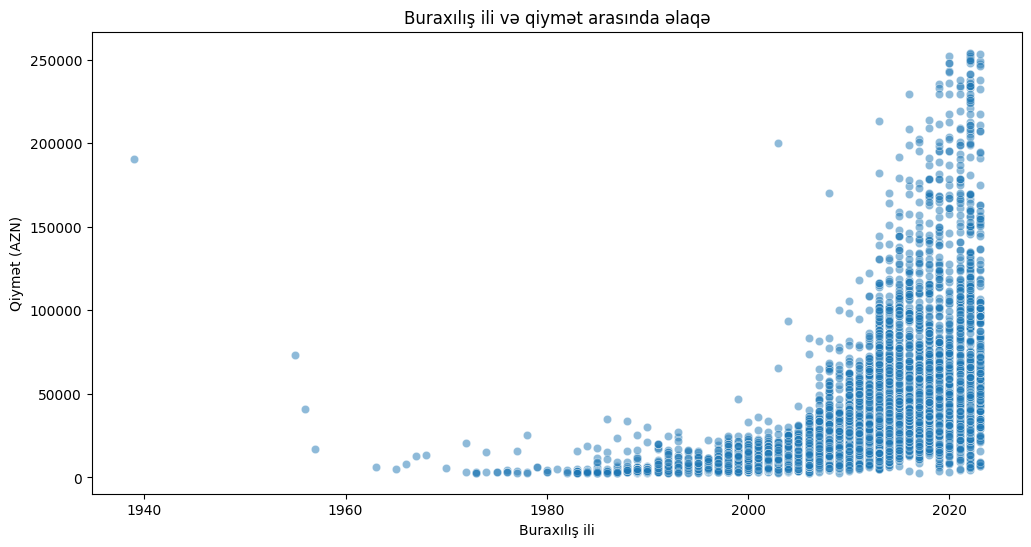

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='buraxılış_ili', y='qiymet_azn', data=df_clean, alpha=0.5)
plt.title('Buraxılış ili və qiymət arasında əlaqə')
plt.xlabel('Buraxılış ili')
plt.ylabel('Qiymət (AZN)')
plt.show()

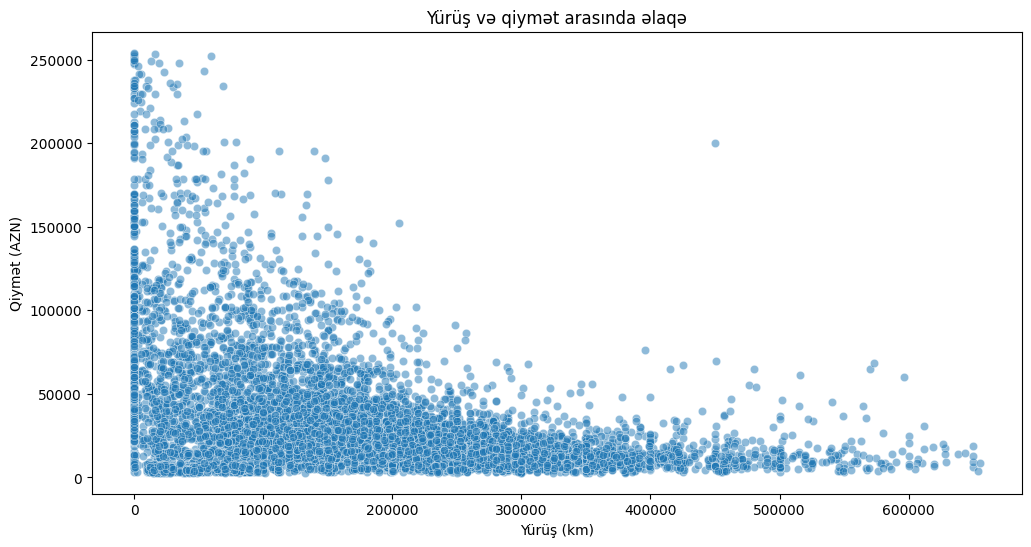

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='yurus_km', y='qiymet_azn', data=df_clean, alpha=0.5)
plt.title('Yürüş və qiymət arasında əlaqə')
plt.xlabel('Yürüş (km)')
plt.ylabel('Qiymət (AZN)')
plt.show()

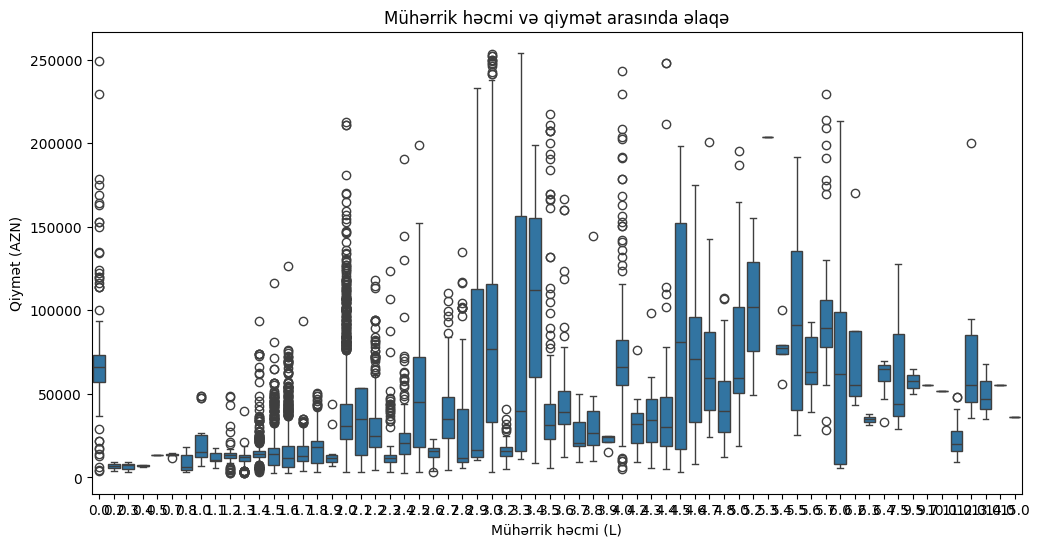

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='muherrik_hecmi', y='qiymet_azn', data=df_clean)
plt.title('Mühərrik həcmi və qiymət arasında əlaqə')
plt.xlabel('Mühərrik həcmi (L)')
plt.ylabel('Qiymət (AZN)')
plt.show()

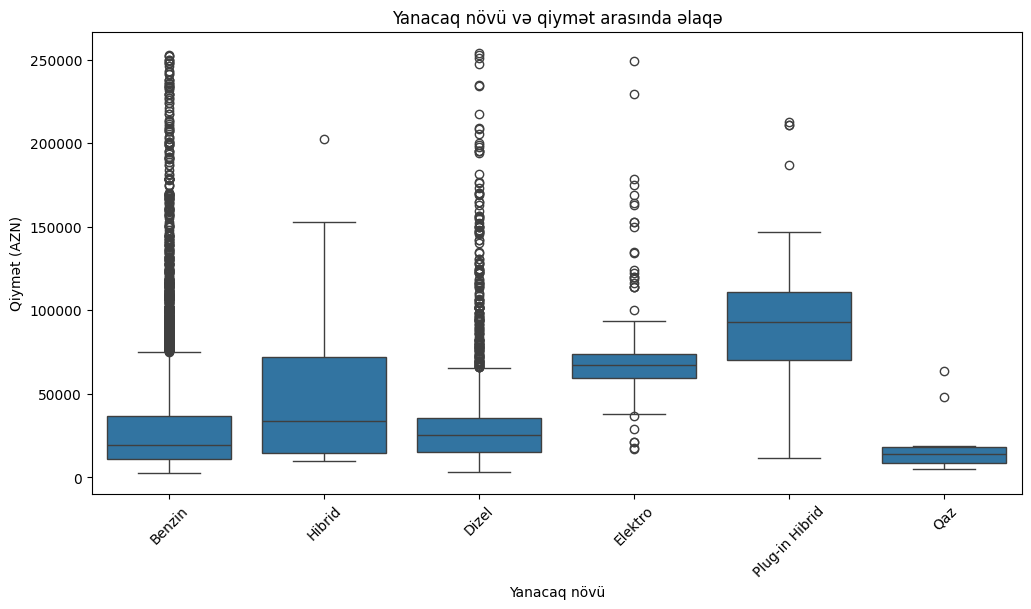

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='yanacaq_novu', y='qiymet_azn', data=df_clean)
plt.title('Yanacaq növü və qiymət arasında əlaqə')
plt.xlabel('Yanacaq növü')
plt.ylabel('Qiymət (AZN)')
plt.xticks(rotation=45)
plt.show()

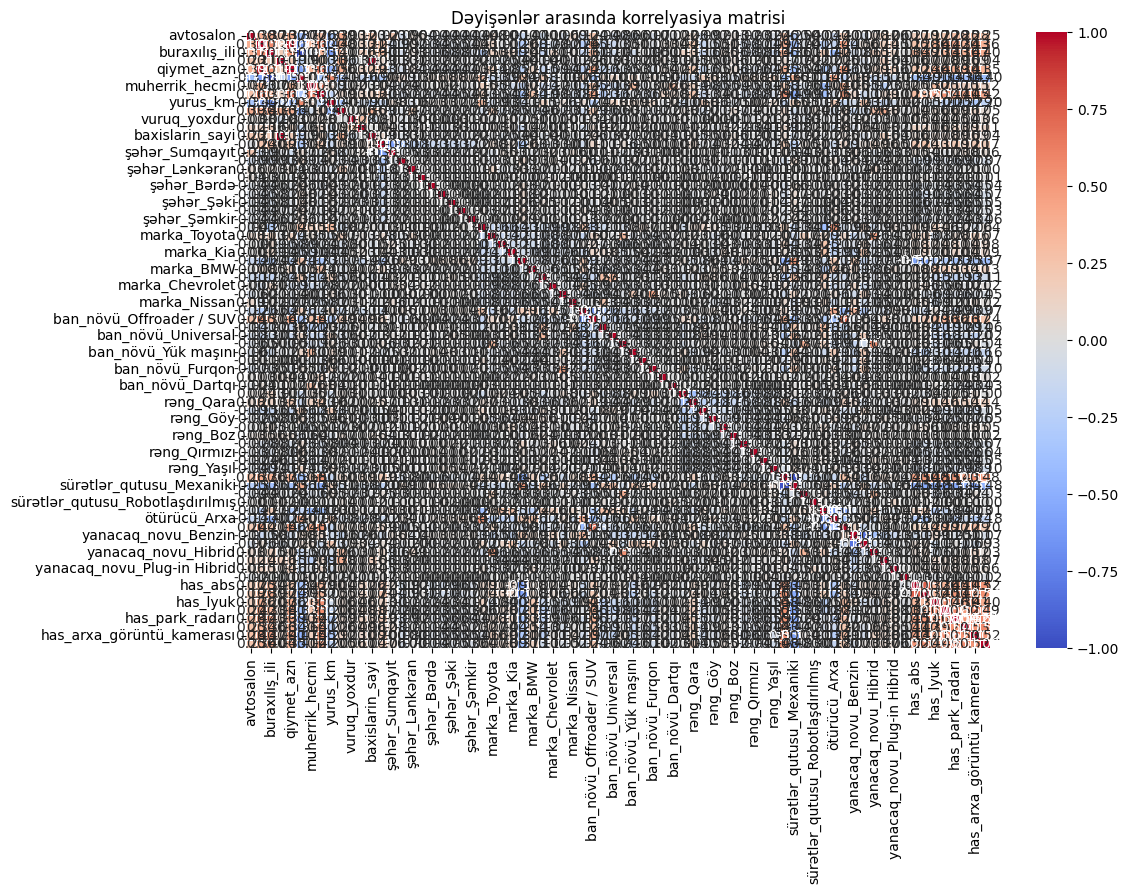

In [34]:

numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Dəyişənlər arasında korrelyasiya matrisi')
plt.show()